In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [3]:
baseline_K_val = [1, 4, 7, 10, 13]
SUBJECT = "Harold"

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.ModelTrainer(config, subject=f"{SUBJECT}")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_H.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/18 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
(8544, 4, 14, 1) (8544,) (86, 4, 14, 1) (86,)
Dataset 2/18 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
second (8544, 4, 14, 1) (8544,) (86, 4, 14, 1) (86,)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 93.62%
Maximum validation accuracy : 97.67%
Accuracy of test dataset using model V0: 97.6744%
Dataset 3/18 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.9321%
Dataset 4/18 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.1101%
Dataset 5/18 - Session Exp_2025-07-11-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.4431%
Dataset 6/18 - Session Exp_2025-07-11-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 79.8886%
Dataset 7/18 - Session Exp_2025-07-16-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 80.0694%
Dataset 8/18 - Session Exp_2025-07-16-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 77.3056%
Dataset 9/18 - Session Exp_2025-07-17-v1/E9AD0

In [7]:
b_path = 'C:/Users/hml76/PycharmProjects/MindForce/'
baseline_K = ['1', '4', '7', '10', '13']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_H.csv')

In [4]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
pd.DataFrame(Trained_acc_all).to_csv(f'../../Results/Results_{SUBJECT}/Train_Test_per_sessions.csv', index=False)


Dataset 1/18 - Session Exp_2025-07-09-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 92.56%
Maximum validation accuracy : 93.79%

Dataset 2/18 - Session Exp_2025-07-09-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 88.84%
Maximum validation accuracy : 90.32%

Dataset 3/18 - Session Exp_2025-07-10-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 88.79%
Maximum validation accuracy : 91.63%

Dataset 4/18 - Session Exp_2025-07-10-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 89.2%
Maximum validation accuracy : 92.1%

Dataset 5/18 - Session Exp_2025-07-11-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 93.45%
Maximum validation 

In [8]:
for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")

Average of acc without training anything (should be random): 7.00%
Average of acc using previous test data after training: 88.21%
Average of acc using current test data after training: 92.68%
K-1: 84.31% | Target: 92.61
K-4: 90.28% | Target: 92.88
K-7: 94.21% | Target: 92.89
K-10: 94.85% | Target: 93.43
K-13: 96.57% | Target: 93.59


In [9]:
np.array(baseline_result['Info'])

NameError: name 'baseline_result' is not defined

In [10]:
Trained_acc_all

[0.9378910660743713,
 0.9032407402992249,
 0.9162607192993164,
 0.9209733605384827,
 0.9570795297622681,
 0.9419819116592407,
 0.886805534362793,
 0.9315900206565857,
 0.9035474061965942,
 0.9080379605293274,
 0.9172062873840332,
 0.9352818131446838,
 0.9427312612533569,
 0.9468801021575928,
 0.9422942996025085,
 0.9110493659973145,
 0.946465790271759,
 0.9326183199882507]

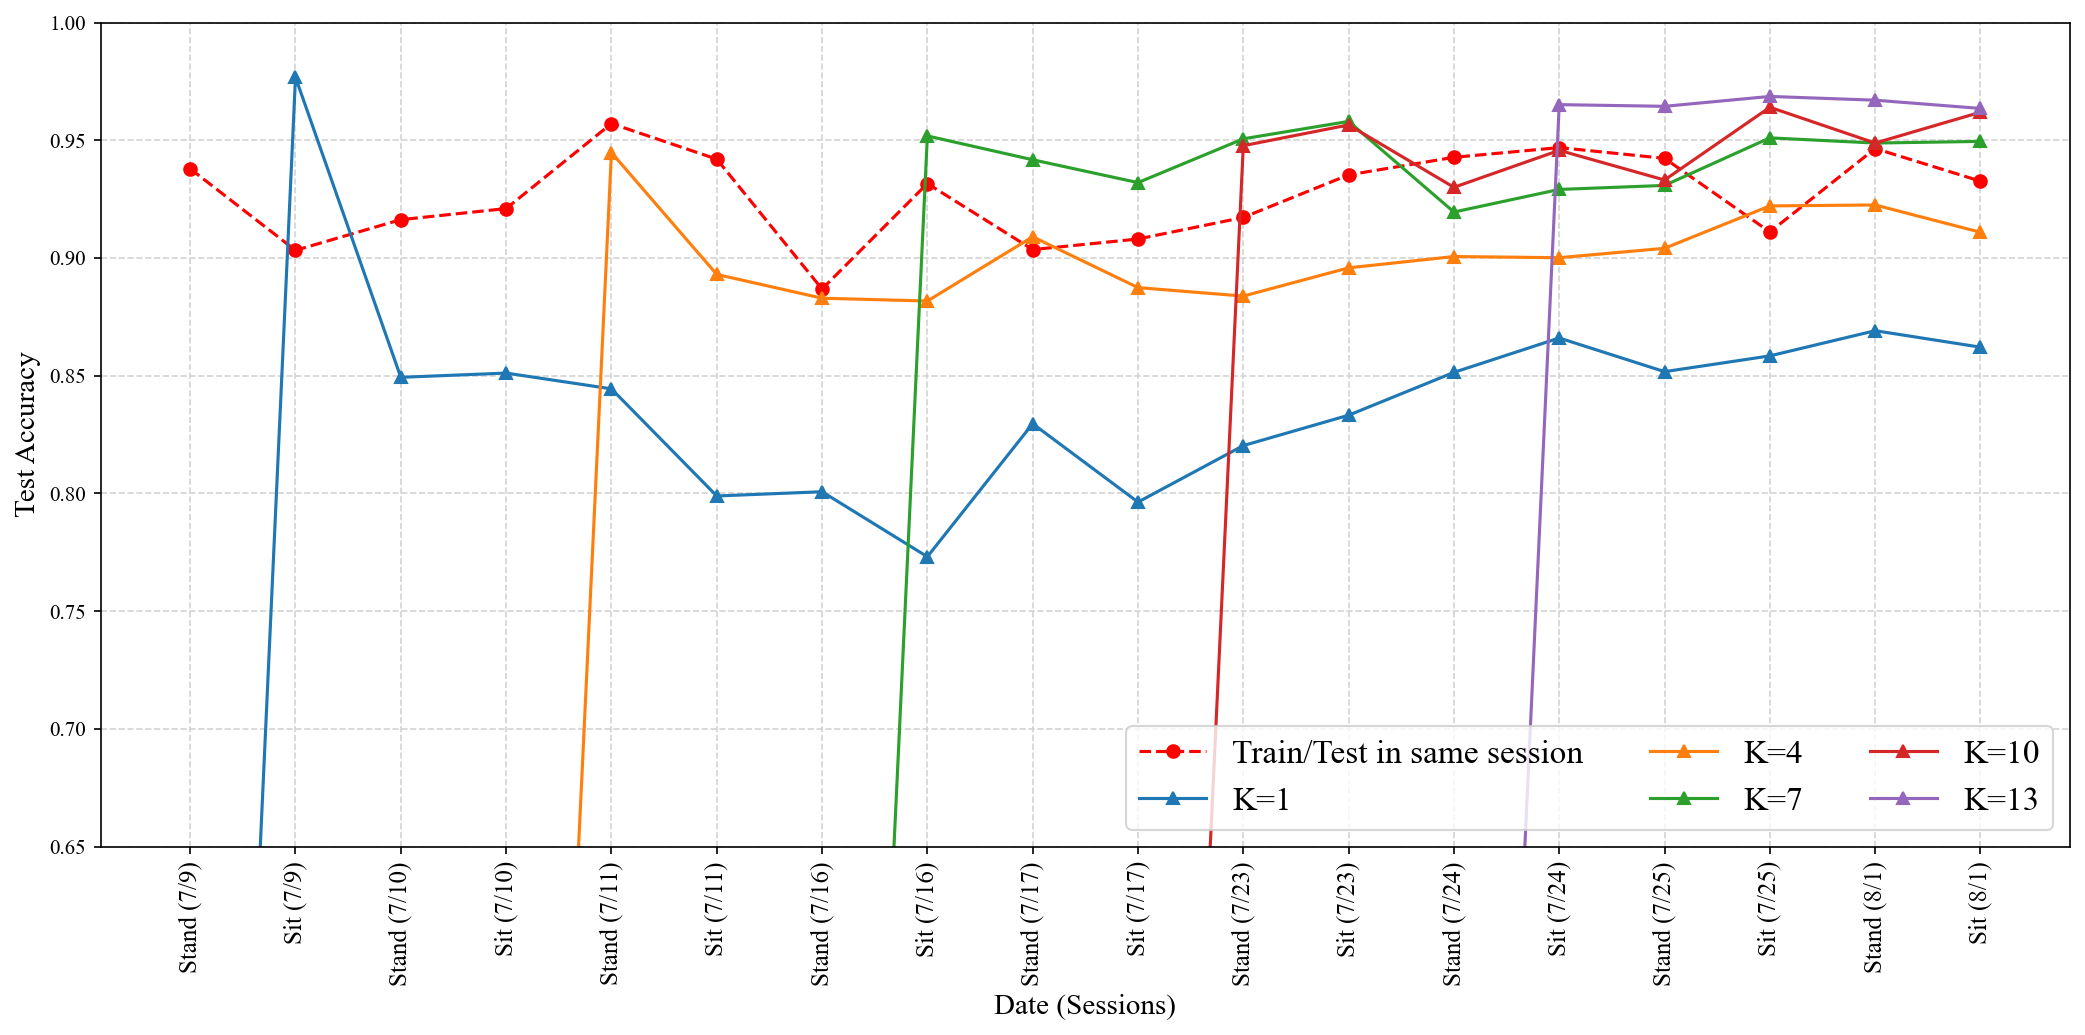

In [11]:
import matplotlib.pyplot as plt

Trained_acc_all_stored = [0.9378910660743713, 0.9032407402992249, 0.9162607192993164, 0.9209733605384827, 0.9570795297622681, 0.9419819116592407, 0.886805534362793, 0.9315900206565857, 0.9035474061965942, 0.9080379605293274, 0.9172062873840332, 0.9352818131446838, 0.9427312612533569, 0.9468801021575928, 0.9422942996025085, 0.9110493659973145, 0.946465790271759, 0.9326183199882507]

X_labels = ['Stand (7/9)', 'Sit (7/9)', 'Stand (7/10)', 'Sit (7/10)', 'Stand (7/11)', 'Sit (7/11)', 'Stand (7/16)', 'Sit (7/16)', 'Stand (7/17)', 'Sit (7/17)',
            'Stand (7/23)', 'Sit (7/23)', 'Stand (7/24)', 'Sit (7/24)', 'Stand (7/25)', 'Sit (7/25)', 'Stand (8/1)', 'Sit (8/1)']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 7), dpi=150)
#plt.title('Training from scratch every time', fontsize=15)
plt.plot(Trained_acc_all_stored, c='red', label='Train/Test in same session', marker='o', linestyle='--')
for idx, base in enumerate(baselines):
    baseline_result = pd.read_csv(base)
    plt.plot(X_labels, baseline_result['Accuracy'] / 100, marker='^', label=f'K={baseline_K[idx]}', linestyle='-')

#plt.ylim([0, 1])
plt.ylim([0.65, 1])
plt.xlabel('Date (Sessions)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=16, ncol=3)
plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()